In [50]:
import argparse
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
mat_contents = sio.loadmat('/home/dataj/SynthText/gt.mat')

In [5]:
len(mat_contents)

7

In [38]:
for k in mat_contents:
    print(k)
    if not k.startswith("__") : 
        print(mat_contents[k].shape)
        

__header__
__version__
__globals__
charBB
(1, 858750)
wordBB
(1, 858750)
imnames
(1, 858750)
txt
(1, 858750)


In [43]:
print(mat_contents['imnames'][:,0])

[array(['8/ballet_106_0.jpg'], dtype='<U18')]


In [39]:
for k in mat_contents:
    print(k)
    if not k.startswith("__") : 
        print(mat_contents[k][:,0])

__header__
__version__
__globals__
charBB
[array([[[423.16126397, 439.60847343, 450.66887979, 466.31976402,
         479.76190495, 504.59927448, 418.80489444, 450.13965942,
         464.16775197, 480.46891089, 502.46437709, 413.02373632,
         433.01396211, 446.7222192 , 470.28467827, 482.51674486,
         116.52285438, 139.51408587, 150.7448586 , 162.03366629,
         322.84717946, 333.54881536, 343.28386485, 363.07416389,
         323.48968759, 337.98503283, 356.66355903, 160.48517048,
         174.1707753 , 189.64454066, 155.7637383 , 167.45490471,
         179.63644201, 262.2183876 , 271.75848874, 284.05396524,
         298.26103738, 432.8464733 , 449.15387392, 468.07231897,
         428.11482147, 445.61538159, 469.24565878, 296.86441324,
         323.6603118 , 344.09880401, 101.14677814, 110.45423597,
         120.54555495, 131.18342618, 132.20545124, 110.01673682,
         120.83144568, 131.35885673],
        [438.2997574 , 452.61288403, 466.31976402, 482.22585715,
         

In [42]:
print(mat_contents['wordBB'][:,0][0].shape)

(2, 4, 15)


The above says that there are 15 words in this image.
Bounding coordinates are given by the x,y (1st dim), for 4 corners of the bounding box.

In [46]:
print(mat_contents['txt'][:,0][0].shape)

(8,)


Interestingly, the txt entry for this image only has 8 items. 

In [52]:
mat_contents['imnames'][:,0][0][0]

'8/ballet_106_0.jpg'

In [82]:
import os
img_file = os.path.join('/home/dataj/SynthText/',mat_contents['imnames'][:,0][0][0])
print(img_file)

/home/dataj/SynthText/8/ballet_106_0.jpg


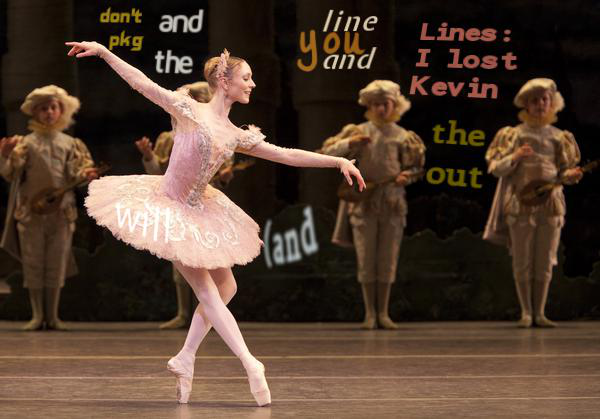

In [83]:
from PIL import Image

display(Image.open(img_file))

In [84]:
print(mat_contents['txt'][:,0][0])

['Lines:\nI lost\nKevin ' 'will                ' 'line\nand            '
 'and\nthe             ' '(and                ' 'the\nout             '
 'you                 ' "don't\n pkg          "]


Looks like the strings in text need to also be split by space and \n to get the 15 words extracted

In [87]:
 mat_contents['txt'][:,0][0][0]

'Lines:\nI lost\nKevin '

In [96]:
 mat_contents['txt'][:,0][0][0].split('\n')

['Lines:', 'I lost', 'Kevin ']

In [123]:
words = ' '.join(mat_contents['txt'][:,0][0]).split()
words

['Lines:',
 'I',
 'lost',
 'Kevin',
 'will',
 'line',
 'and',
 'and',
 'the',
 '(and',
 'the',
 'out',
 'you',
 "don't",
 'pkg']

In [135]:
def image_words(image_idx):
    image_name = mat_contents['imnames'][:,image_idx][0][0]
    img_file = os.path.join('/home/dataj/SynthText/',image_name)
    display(Image.open(img_file))
    print("Number of bounding boxes: ", mat_contents['wordBB'][:,image_idx][0].shape[2])
    print('\ntxt info\n', mat_contents['txt'][:,image_idx][0])
    words = ' '.join(mat_contents['txt'][:,image_idx][0]).split()
    print('\nWords after join and split:\n', words)
    print("\nNumber of words extracted: ", len(words))


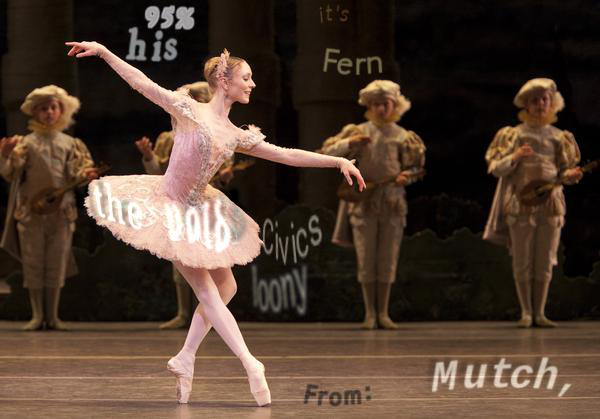

Number of bounding boxes:  10

txt info
 ['Fern  ' 'Mutch,' 'void  ' 'his   ' 'loony ' "it's  " 'From: ' 'the   '
 '95%   ' 'Civics']

Words after join and split:
 ['Fern', 'Mutch,', 'void', 'his', 'loony', "it's", 'From:', 'the', '95%', 'Civics']

Number of words extracted:  10


In [136]:
image_words(2)

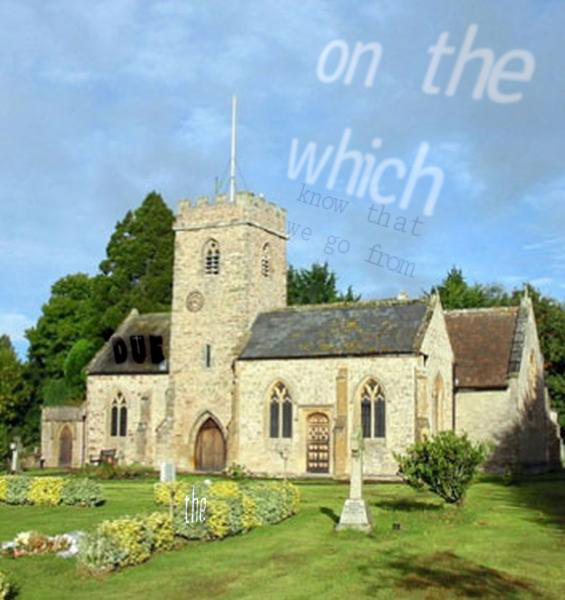

Number of bounding boxes:  10

txt info
 ['on the\nwhich         ' 'the                  ' 'due                  '
 'know that \nwe go from']

Words after join and split:
 ['on', 'the', 'which', 'the', 'due', 'know', 'that', 'we', 'go', 'from']

Number of words extracted:  10


In [138]:
image_words(800000)